#### ML models which are sensitive to outliers -

1. Naive Bayes Classifier - Not sensitive
2. Linear Regression - sensitive
3. Logistic regression - sensitive
4. Decision tree - not sensitive
5. Random forest - not sensitive
6. KNN - not sensitive
7. SVM - Not sensitive
8. Kmeans - sensitive
9. Hierarchical - sensitive
10. PCA - sensitive
11. Neaural Networks - not sensitive

In [2]:
import pandas as pd

df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
import seaborn as sns

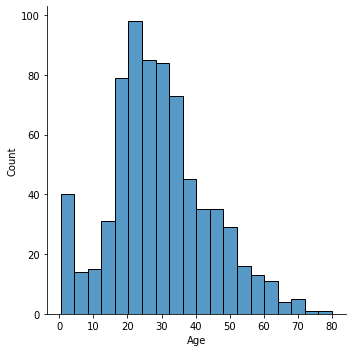

In [6]:
sns.displot(df['Age'].dropna())

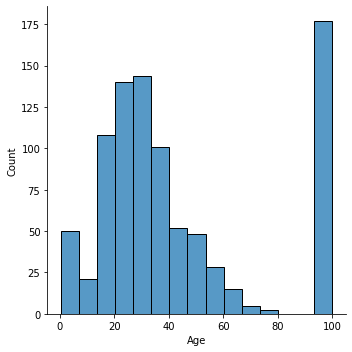

In [7]:
sns.displot(df['Age'].fillna(100))

Text(0, 0.5, 'no of passenger')

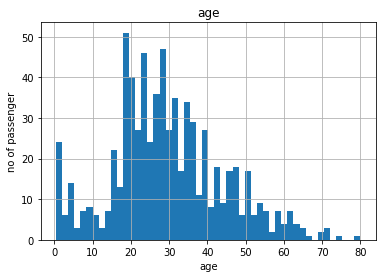

In [8]:
figure = df.Age.hist(bins=50)
figure.set_title('age')
figure.set_xlabel('age')
figure.set_ylabel('no of passenger')

Text(0, 0.5, 'no of passenger')

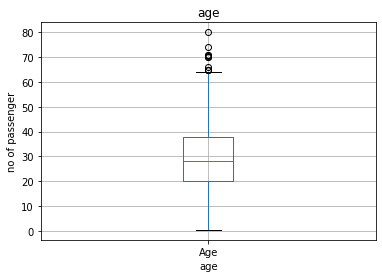

In [9]:
figure = df.boxplot(column='Age')
figure.set_title('age')
figure.set_xlabel('age')
figure.set_ylabel('no of passenger')

In [10]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [30]:
## IF the data is normally distributed

### Assuming age follows gauassian distribution which differentiates the outlier

upper_boundary = df['Age'].mean() + 3*df['Age'].std()
lower_boundary = df['Age'].mean() - 3*df['Age'].std()

print(upper_boundary), print(lower_boundary), print(df['Age'].mean())

73.27860964406094
-13.880374349943303
29.69911764705882


(None, None, None)

In [31]:
## if data is skewed

### IQR to calulate boundaries

IQR = df.Age.quantile(0.75) - df.Age.quantile(0.25)
lower_bridge = df.Age.quantile(0.25) - 1.5*IQR
upper_bridge = df.Age.quantile(0.75) + 1.5*IQR

print(lower_bridge), print(upper_bridge)

-6.6875
64.8125


(None, None)

In [16]:
#Extreme outliers

IQR = df.Age.quantile(0.75) - df.Age.quantile(0.25)
lower_bridge = df.Age.quantile(0.25) - 3*IQR
upper_bridge = df.Age.quantile(0.75) + 3*IQR

print(lower_bridge), print(upper_bridge)

-33.5
91.625


(None, None)

Text(0, 0.5, 'no of passenger')

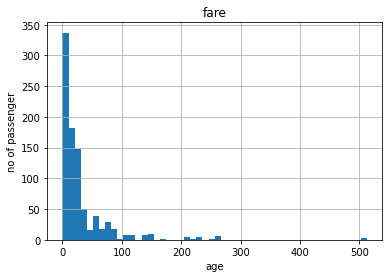

In [19]:
figure = df.Fare.hist(bins=50)
figure.set_title('fare')
figure.set_xlabel('age')
figure.set_ylabel('no of passenger')

Text(0, 0.5, 'no of passenger')

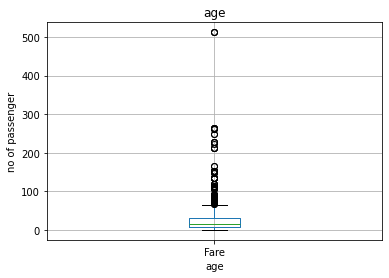

In [20]:
figure = df.boxplot(column='Fare')
figure.set_title('age')
figure.set_xlabel('age')
figure.set_ylabel('no of passenger')

In [21]:
df.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [24]:
IQR = df.Fare.quantile(0.75) - df.Fare.quantile(0.25)
lower_bridge = df.Fare.quantile(0.25) - 3*IQR
upper_bridge = df.Fare.quantile(0.75) + 3*IQR

print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [25]:
data = df.copy()

In [26]:
data.loc[data['Age']>=73,'Age']=73

In [27]:
data.loc[data['Fare']>=100,'Fare']=100

Text(0, 0.5, 'no of passenger')

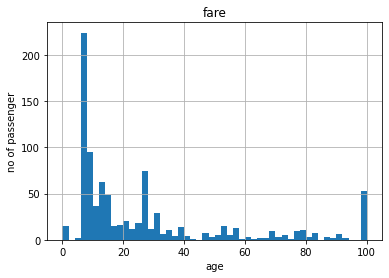

In [29]:
figure = data.Fare.hist(bins=50)
figure.set_title('fare')
figure.set_xlabel('age')
figure.set_ylabel('no of passenger')

In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [33]:
### logistic regression

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score, roc_auc_score

print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))
print("roc score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy score: 0.6977611940298507
Accuracy score: 0.7459830557990066


In [35]:
### random forest regression

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score, roc_auc_score

print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))
print("roc score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy score: 0.6567164179104478
roc score: 0.7215892491966113
